# iGEM Human Practice Data Analysis - Scatter Plots

In [92]:
from __future__ import division, print_function # Makes division and printing work like python 3 (we're using 2)
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from tabulate import tabulate
import csv
%matplotlib inline

In [93]:
data_2013 = os.path.join(os.getcwd(), 'datasets', '2013N.csv')
data2013 = pd.read_csv(data_2013)
#data2013.head(3)

In [94]:
data_2014 = os.path.join(os.getcwd(), 'datasets', '2014N.csv')
data2014 = pd.read_csv(data_2014)
#data2014.head(3)

In [95]:
data_2015 = os.path.join(os.getcwd(), 'datasets', '2015N.csv')
data2015 = pd.read_csv(data_2015)
#data2015.head(3)

In [96]:
coor = os.path.join(os.getcwd(), 'datasets', 'coordinates.csv')
coordinates = pd.read_csv(coor)
#coordinates.head(3)

In [97]:
#coordinates[0:1][['x', 'y', 'z']].values

In [98]:
distance_matrix = distance.cdist(coordinates[0:46][['x', 'y', 'z']].values, coordinates[0:46][['x', 'y', 'z']].values, 'euclidean')

In [99]:
p_2013 = data2013.values[:, 4:]
p_2014 = data2014.values[:, 4:]
p_2015 = data2015.values[:, 4:]

In [100]:
print(p_2013.shape)
print(p_2014.shape)
print(p_2015.shape)

(104, 45)
(113, 45)
(153, 45)


In [101]:
for i in range(104):
    for j in range(44):
        p_2013[i][j+1] /= float(p_2013[i][0])

In [102]:
for i in range(113):
    for j in range(44):
        p_2014[i][j+1] /= float(p_2014[i][0])

In [103]:
for i in range(153):
    for j in range(44):
        p_2015[i][j+1] /= float(p_2015[i][0])

In [104]:
# Function that gives a table of each years mean, median, std, max, min with different medals
def calculations(data_year, diversity_year):
    gold_div = []
    silver_div = []
    bronze_div = []
    none_div = []
    
    for i in range(len(diversity_year)):
        if data_year.Medal[i] == 1:
            gold_div.append(diversity_year[i])
        if data_year.Medal[i] == 2:
            silver_div.append(diversity_year[i])
        if data_year.Medal[i] == 3:
            bronze_div.append(diversity_year[i])
        if data_year.Medal[i] == 4:
            none_div.append(diversity_year[i])

    print(tabulate([["Gold", np.mean(gold_div), np.median(gold_div),np.std(gold_div), np.max(gold_div), np.min(gold_div)],
                    ["Silver", np.mean(silver_div), np.median(silver_div),np.std(silver_div), np.max(silver_div), np.min(silver_div)],
                    ["Bronze", np.mean(bronze_div), np.median(bronze_div),np.std(bronze_div), np.max(bronze_div), np.min(bronze_div)],
                    ["None", np.mean(none_div), np.median(none_div),np.std(none_div), np.max(none_div), np.min(none_div)]],
                   ["Medal", "Mean", "Median", "Standard deviation", "Max", "Min"], "grid"))

In [105]:
diversity_2013 = []
for i in range(104):
    diversity = 0
    for j in range(1, 44):
        if p_2013[i][j] > 0:
            base = p_2013[i][j]
            for k in range(j+1, 45):
                if p_2013[i][k] > 0:
                    diversity += distance_matrix[j][k] * p_2013[i][j] * p_2013[i][k]
    diversity_2013.append(diversity)

#print(len(diversity_2013))

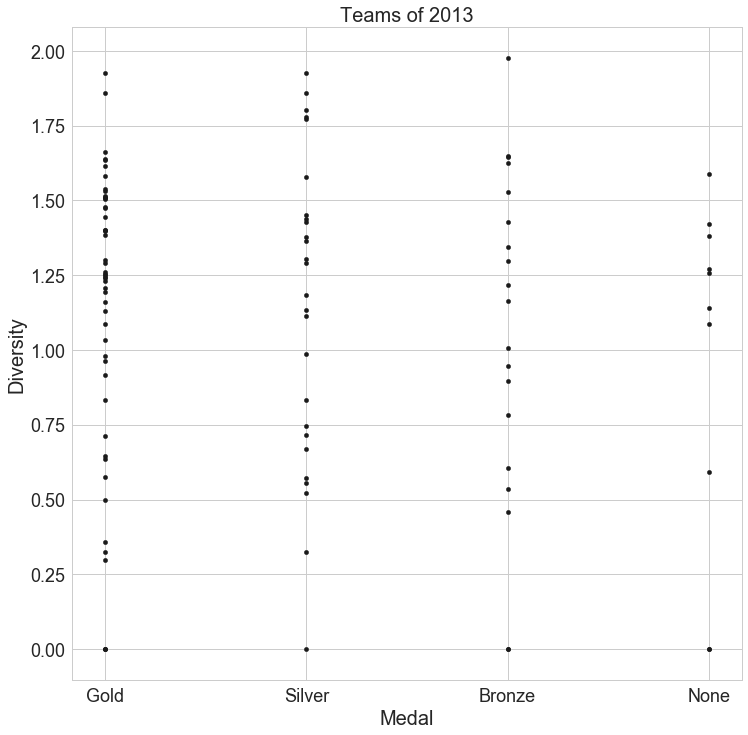

In [106]:
plt.figure(figsize=(12,12))
plt.xticks(range(1,5),['Gold', 'Silver', 'Bronze','None'])
plt.scatter(data2013.Medal, diversity_2013, color='k', s=20)
plt.title("Teams of 2013", size=20)
plt.ylabel("Diversity", size=20)
plt.xlabel("Medal", size=20)
plt.tick_params(labelsize=18)
plt.savefig("2013 diversity scatter plot.png", dpi=500)
plt.show()

In [107]:
calculations(data2013, diversity_2013)

+---------+----------+----------+----------------------+---------+-------+
| Medal   |     Mean |   Median |   Standard deviation |     Max |   Min |
+=========+==========+==========+======================+=========+=======+
| Gold    | 1.13559  |  1.2501  |             0.482287 | 1.92593 |     0 |
+---------+----------+----------+----------------------+---------+-------+
| Silver  | 1.14335  |  1.23842 |             0.507326 | 1.92716 |     0 |
+---------+----------+----------+----------------------+---------+-------+
| Bronze  | 1.05851  |  1.16274 |             0.542267 | 1.97548 |     0 |
+---------+----------+----------+----------------------+---------+-------+
| None    | 0.973701 |  1.19872 |             0.547083 | 1.58677 |     0 |
+---------+----------+----------+----------------------+---------+-------+


In [108]:
diversity_2014 = []
for i in range(113):
    diversity = 0
    for j in range(1, 44):
        if p_2014[i][j] > 0:
            base = p_2014[i][j]
            for k in range(j+1, 45):
                if p_2014[i][k] > 0:
                    diversity += distance_matrix[j][k] * p_2014[i][j] * p_2014[i][k]
    diversity_2014.append(diversity)

#print(diversity_2014)

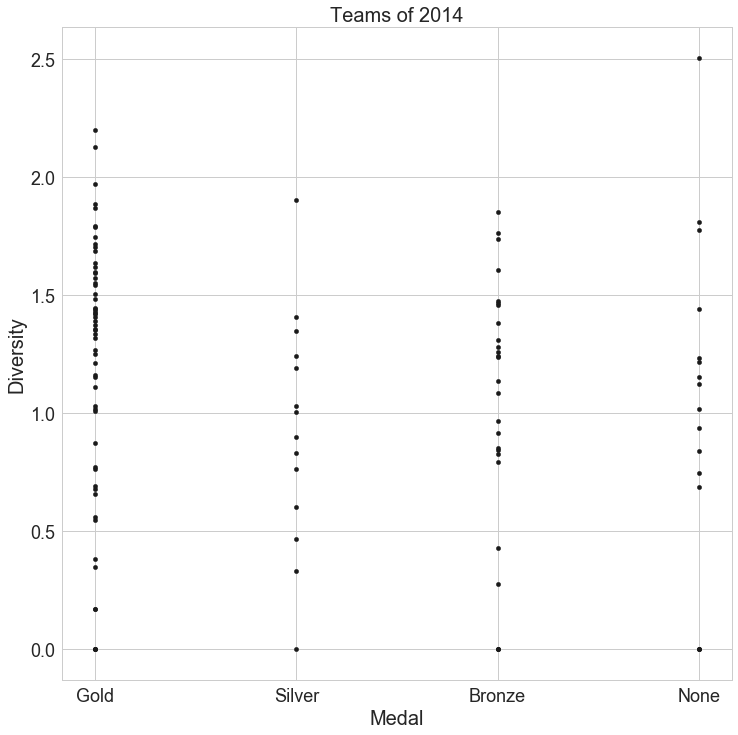

In [109]:
plt.figure(figsize=(12,12))
plt.xticks(range(1,5),['Gold', 'Silver', 'Bronze','None'])
plt.scatter(data2014.Medal, diversity_2014, color='k', s=20)
plt.title("Teams of 2014", size=20)
plt.ylabel("Diversity", size=20)
plt.xlabel("Medal", size=20)
plt.tick_params(labelsize=18)
plt.savefig("2014 diversity scatter plot.png", dpi=500)
plt.show()

In [110]:
calculations(data2014, diversity_2014)

+---------+----------+----------+----------------------+---------+-------+
| Medal   |     Mean |   Median |   Standard deviation |     Max |   Min |
+=========+==========+==========+======================+=========+=======+
| Gold    | 1.19499  | 1.35742  |             0.567066 | 2.19765 |     0 |
+---------+----------+----------+----------------------+---------+-------+
| Silver  | 0.929753 | 0.951941 |             0.47137  | 1.90182 |     0 |
+---------+----------+----------+----------------------+---------+-------+
| Bronze  | 1.04586  | 1.18614  |             0.53077  | 1.85148 |     0 |
+---------+----------+----------+----------------------+---------+-------+
| None    | 1.03032  | 1.07106  |             0.662988 | 2.50434 |     0 |
+---------+----------+----------+----------------------+---------+-------+


In [111]:
diversity_2015 = []
for i in range(153):
    diversity = 0
    for j in range(1, 44):
        if p_2015[i][j] > 0:
            base = p_2015[i][j]
            for k in range(j+1, 45):
                if p_2015[i][k] > 0:
                    diversity += distance_matrix[j][k] * p_2015[i][j] * p_2015[i][k]
    diversity_2015.append(diversity)

#print(diversity_2015)

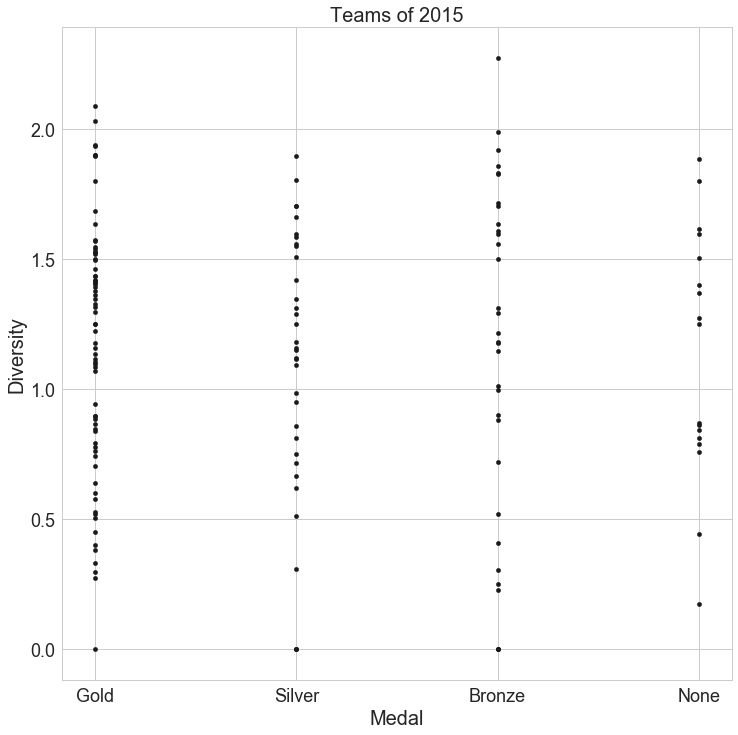

In [112]:
plt.figure(figsize=(12,12))
plt.xticks(range(1,5),['Gold', 'Silver', 'Bronze','None'])
plt.scatter(data2015.Medal, diversity_2015, color='k', s=20)
plt.title("Teams of 2015", size=20)
plt.ylabel("Diversity", size=20)
plt.xlabel("Medal", size=20)
plt.tick_params(labelsize=18)
plt.savefig("2015 diversity scatter plot.png", dpi=500)
plt.show()

In [113]:
calculations(data2015, diversity_2015)

+---------+---------+----------+----------------------+---------+---------+
| Medal   |    Mean |   Median |   Standard deviation |     Max |     Min |
+=========+=========+==========+======================+=========+=========+
| Gold    | 1.1647  |  1.2499  |             0.481853 | 2.08703 | 0       |
+---------+---------+----------+----------------------+---------+---------+
| Silver  | 1.0932  |  1.1534  |             0.513584 | 1.89553 | 0       |
+---------+---------+----------+----------------------+---------+---------+
| Bronze  | 1.1422  |  1.19837 |             0.643038 | 2.27215 | 0       |
+---------+---------+----------+----------------------+---------+---------+
| None    | 1.13164 |  1.25122 |             0.469035 | 1.88513 | 0.17402 |
+---------+---------+----------+----------------------+---------+---------+
